Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = " Ahmed"
COLLABORATORS = ""

---

# CS110 Pre-class Work 2.1

## Question 1.

First, please read carefully [this note](https://drive.google.com/open?id=1SfrRTKWDb6szsJENgvNF7-u2B96ecaF2) which reviews the MERGE operation in Cormen et al.

After reviewing the example above (Cormen et. al., Figure 2.3),  you need to manually create similar illustrations as in the example above but this time for the input array:

![array](array.png)

For this exercise, assume that the call to the algorithm is MERGE(A, 1, 3, 6) and draw different resulting stages of the arrays A, L, and R as the merge algorithm is executed.  You can hand-draw or use any drawing tool to produce panel illustrations as in the example above.  Include your final drawings in the cell below. Feel free to use additional cells (Markdown or Code) for this question.


![sort](Q1-1.jpg)

![sort2](Q1-2.jpg) 

## Question 2.
Now using your understanding of Part I of the merge algorithm, can you think of an efficient way to implement this part in Python? (hint: using Python list). Give your answer in prose in the cell below.

"""
First
I think the most important part in implementing the pseudocode in python is to understand the characteristics of python and how it might be different than other languages. In python, the lists start at 0 which mean that we need to modify the pseudocode to reflect that. Also, we need to understand how the range function work and how can we iterate considering that the for loop stops before the last number in range(len(list)). 

Second
I am thinking instead of building two empty lists and then copy the list items in them (using the two for loops). We can just split the original A list into two lists based on the parameters. 
something like : (A, p, q, r) -> A[p,q+1] A[q,r+1]

Third
To apply the sentinel card concept in python, it will be hard to define infinity. (I tried to use float("inf") to represent infinity, but it doesn't work the same way it was described in the pseudocode. 
Instead, we can write "while loops" to check that we didn't leave any number behind in the right and left lists.
"""

## Question 3.

Write a Python implementation of the merge pseudocode (both parts), your Python function must take the same four input arguments as described in the $MERGE(A,p,q,r)$. Test your code by running the example in problem 1 and 2 of this pre-class work. Feel free to come up with additional cases to check if your code is working properly. Your code should return A 

In [52]:
def merge(A, p, q, r):
    
    #defining the length of each sub-list
    n1 = q-p+1
    n2 = r-q
    
    #defining new arrays
    L=[0]* n1
    R=[0]* n2
    
    #splitting the orginal set into two lists 
    #we can also use append to fill the empty sets as the orginal set already had two odered parts, but this would be a different method than the one in the book
    for i in range(n1):
        L[i]= A[p+i]
        
    for j in range(n2):
        R[j]= A[q+j+1]   # I added the one here to make sure that the right list will start with the item after q till r

     
       
    i= 0
    j= 0
    k= p
    
    #I suggested using while instead of for as this will make it easir for the iterations
    
    while i < len(L) and j < len(R): 
        if L[i] < R[j]: 
            A[k] = L[i] 
            i+=1
        else: 
            A[k] = R[j] 
            j+=1
        k+=1
        
    while i < n1: 
        A[k] = L[i] 
        i += 1
        k += 1
        
    while j < n2: 
        A[k] = R[j] 
        j += 1
        k += 1
        
    return (A)
    raise NotImplementedError()
    
    
"""
Another way of solving it: 
    # Here I will arrange all the list except the maximum number as the range is r. 
    
    for k in range (p,r):
        if L[i] <= R[j]:
            A[k]=L[i]
            i =i+1
        else:
            A[k]=R[j]
            j=j+1
    
    #Here I increased the index of k to take all the 
    k +=1
    
    while i < n1: 
        A[k] = L[i] 
        i += 1
        k += 1
        
    while j < n2: 
        A[k] = R[j] 
        j += 1
        k += 1
"""    

    
    


#Testing the function with the provided examples 
Ex1 = [5,2,4,5,7,1,2,3,6,8]
Ex2 = [2,6,7,8,1,4,6,9]

print (merge(Ex1, 1, 4,8))
print (merge(Ex2, 0, 3,7))


[5, 1, 2, 2, 3, 4, 5, 6, 7, 8]
[1, 2, 4, 6, 6, 7, 8, 9]


In [3]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 2
Suppose that your Python implementation of the merge algorithm is already working. Inspect the code for merge sort below:

In [4]:
def merge_sort(A,p,r):
    if p < r:
        q = (p+r)/2
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A)

Copy and paste the code above to the cell below and fix the bug in it. 

In [59]:
def merge_sort(A,p,r):
    # YOUR CODE HERE
    count =0
    if p < r:
        count +=1
        q = (p+r)//2     
        #the bug is here as for some values here q will be a float number not an integer which has no meaning as an index.
        #thus, I replaced the devision sign with with a floor devision sign to always give us the nearst smallest integer 
        merge_sort(A,p,q)
        merge_sort(A,q+1,r)
        merge(A,p,q,r)
    return(A,count)
    
    raise NotImplementedError()
    
print (merge_sort(Ex2, 0, 7))

([1, 2, 4, 6, 6, 7, 8, 9], 1)


In [6]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

# Question 5.
As in the previous Lesson, count the number of steps and time your merge_sort() function with the following input: `list_k = [i for i in range(100*k, 0, -1)] `, where $k= 1, 2, 3, …, 15 $. 


In [83]:
import time 

def mergec(A, p, q, r):
    
    #defining the length of each sub-list
    n1 = q-p+1
    n2 = r-q
    
    countmc = 0
    #defining new arrays
    L=[0]* n1
    R=[0]* n2
    
    #splitting the orginal set into two lists 
    #we can also use append to fill the empty sets as the orginal set already had two odered parts, but this would be a different method than the one in the book
    for i in range(n1):
        L[i]= A[p+i]
        
    for j in range(n2):
        R[j]= A[q+j+1]   # I added the one here to make sure that the right list will start with the item after q till r

     
       
    i= 0
    j= 0
    k= p
    
    #I suggested using while instead of for as this will make it easir for the iterations
    
    while i < len(L) and j < len(R): 
        if L[i] < R[j]: 
            A[k] = L[i] 
            i+=1
        else: 
            A[k] = R[j] 
            j+=1
        k+=1
        countmc += 1
        
    while i < n1: 
        A[k] = L[i] 
        i += 1
        k += 1
        
    while j < n2: 
        A[k] = R[j] 
        j += 1
        k += 1
        
    return (countmc)
    raise NotImplementedError()
    





def merge_sortc(A,p,r):
    # YOUR CODE HERE
    countm =0
    if p < r:
        countm +=1
        q = (p+r)//2     
        #the bug is here as for some values here q will be a float number not an integer which has no meaning as an index.
        #thus, I replaced the devision sign with with a floor devision sign to always give us the nearst smallest integer 
        merge_sortc(A,p,q)
        merge_sortc(A,q+1,r)
        merge(A,p,q,r)
    return(countm)
    raise NotImplementedError()
    
a = time.time
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    var= merge_sort(list_k,0,(100*k-1))
b = time.time

print(b-a)
    
    

count=[] 
countmc =[]
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    count.append(merge_sortc(list_k,0,(100*k-1)))
    countmc.append(mergec(list_k,0,(100*k-1)//2,(100*k-1)))
print (count) #count inside the mergesort functon
print (countmc) #count inside the merge function


TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'builtin_function_or_method'

# Question 6. 
Use the code you wrote for Lesson 1.2 (i.e., selection sort, bubble sort, insertion sort). Plot the following graphs:
* **Graph 1**: 4 lines for **the number of steps** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why? 
* **Graph 2**: 4 lines for **the timing** of each of the 4 sorting algorithms (i.e., selection sort, bubble sort, insertion sort, merge sort). Which algorithm performs best? Why?

Using as many cells as you wish (code cells or markdown cells alike) to complete this question.


In [88]:
import time 
def bubbleSort(A):
    counter = 0;
    for i in range(len(A)-1):
        for j in range(len(A)-1,i, -1):
            if(A[j] < A[j-1]):
                temp = A[j]
                A[j] = A[j-1]
                A[j-1] = temp
                counter = counter + 1
            counter = counter + 1
    return counter
    raise NotImplementedError()
    
bubblecount=[]
a= time.time
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    bubblecount.append(bubbleSort(list_k))
b= time.time
print(b-a) #this line doesn't work, I don't know why. I imported time module, but still not working

print (bubblecount)

<built-in function time>
[9900, 39800, 89700, 159600, 249500, 359400, 489300, 639200, 809100, 999000, 1208900, 1438800, 1688700, 1958600, 2248500]


In [89]:
def insertionSort(A):
    counter = 0
    for j in range(len(A)):
        key = A[j]
        i= j-1
        while i >= 0 and A[i]>key:
            A[i+1] = A[i]
            i -= 1
            counter = counter + 1
        A[i+1] = key
    return counter
    raise NotImplementedError()

insertcount=[]
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    insertcount.append(insertionSort(list_k))
print (insertcount)

[4950, 19900, 44850, 79800, 124750, 179700, 244650, 319600, 404550, 499500, 604450, 719400, 844350, 979300, 1124250]


In [91]:
def selectionSort(A):
    counter = 0
    for i in range(len(A)-1):
        minidx = i
        for j in range(i+1,len(A)):
            if(A[j]<A[minidx]):
                minidx = j
            counter = counter +1
        temp = A[i]
        A[i] = A[minidx]
        A[minidx] = temp
    return counter
    raise NotImplementedError()

selectcount=[]
for k in range (1,16):
    list_k = [i for i in range(100*k, 0, -1)]
    selectcount.append(selectionSort(list_k))
print (selectcount)

[4950, 19900, 44850, 79800, 124750, 179700, 244650, 319600, 404550, 499500, 604450, 719400, 844350, 979300, 1124250]


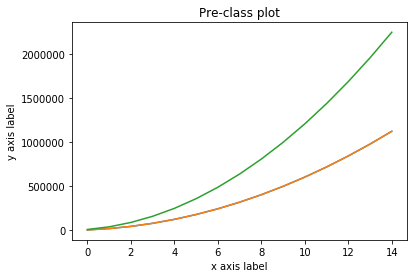

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(selectcount)
plt.plot(insertcount)
plt.plot(bubblecount)
#the bubblesort has the highest number of steps, while the selectionsort and insertionsort share the same number of steps. 
#the time function is not working, but I assume it will have a direct correlation with the graphs.

plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Pre-class plot')
plt.show()